# Linear Regression



      f(x,z) = 15*xs + 20*zs - 120
    
   

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate random input data to train on

In [2]:
observations = 1000


xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))


inputs = np.column_stack((xs,zs))

### Generate the targets

In [3]:
noise = np.random.uniform(-1, 1, (observations,1))

targets = 15*xs + 20*zs - 120 + noise

# save into an npz file called "TF_data"
np.savez('TF_data', inputs=inputs, targets=targets)

### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

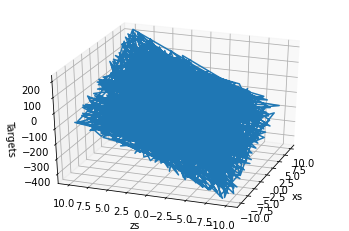

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()
# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')
# Choose the axes.
ax.plot(xs, zs, targets)
# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

#Value of azim=0;100;200.
ax.view_init(azim=200)

plt.show()

# Targets back to the shape that they were in before plotting.
targets = targets.reshape(observations,1)

## Solving with TensorFlow

<i/>the basics of TensorFlow.<i>

In [5]:
# Load the training data from the NPZ
training_data = np.load('TF_data.npz')

In [6]:
# Declare a variable where we will store the input size of our model
input_size = 2
# Declare the output size of the model
output_size = 1


model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
# create a solution that is as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 6931.5703
Epoch 2/100
32/32 - 0s - loss: 458.6500
Epoch 3/100
32/32 - 0s - loss: 32.1650
Epoch 4/100
32/32 - 0s - loss: 2.9059
Epoch 5/100
32/32 - 0s - loss: 0.5468
Epoch 6/100
32/32 - 0s - loss: 0.3858
Epoch 7/100
32/32 - 0s - loss: 0.3638
Epoch 8/100
32/32 - 0s - loss: 0.3814
Epoch 9/100
32/32 - 0s - loss: 0.3667
Epoch 10/100
32/32 - 0s - loss: 0.3842
Epoch 11/100
32/32 - 0s - loss: 0.4215
Epoch 12/100
32/32 - 0s - loss: 0.3603
Epoch 13/100
32/32 - 0s - loss: 0.3670
Epoch 14/100
32/32 - 0s - loss: 0.3951
Epoch 15/100
32/32 - 0s - loss: 0.3812
Epoch 16/100
32/32 - 0s - loss: 0.3619
Epoch 17/100
32/32 - 0s - loss: 0.3820
Epoch 18/100
32/32 - 0s - loss: 0.3719
Epoch 19/100
32/32 - 0s - loss: 0.3932
Epoch 20/100
32/32 - 0s - loss: 0.3781
Epoch 21/100
32/32 - 0s - loss: 0.3663
Epoch 22/100
32/32 - 0s - loss: 0.3929
Epoch 23/100
32/32 - 0s - loss: 0.4003
Epoch 24/100
32/32 - 0s - loss: 0.3899
Epoch 25/100
32/32 - 0s - loss: 0.3847
Epoch 26/100
32/32 - 0s - lo

## Extract the weights and bias

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[14.997849],
       [20.025196]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([-120.01816], dtype=float32)

## Extract the outputs (make predictions)

## Plotting the data

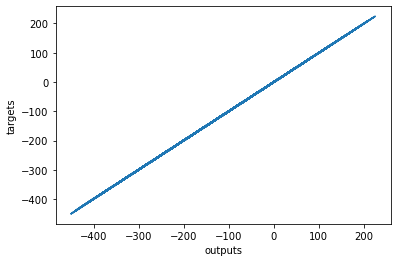

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()